In [31]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import matplotlib as mpl
import matplotlib.animation as animation
from tqdm import tqdm

In [32]:
Nt = 500
Nx = 60
Ny = 60

x = np.linspace(-5,5,Nx)
y = np.linspace(-5,5,Nx)
t = np.linspace(0,10,Nt)

deltax = x[1] - x[0]
deltay = y[1] - y[0]
deltat = t[1] - t[0]

v = 0.3

lambda_ = (v*deltat)/deltax**2
mu_ = (v*deltat)/deltay**2

lambda1_ = deltat/(2*deltax)
mu1_ = deltat/(2*deltay)




#print(lambda_,mu_)

In [49]:
def Ti(x,y):
    return 5*np.exp(-1*((x)**2 + (y)**2))

In [50]:
def InitT():
    
    T = np.zeros((Nt,Nx,Ny))
    
    T[0,:,:] = Ti(x,y)
    
    T[:,:,0] = 0.
    T[:,:,-1] = 0.
    T[:,0,:] = 0.
    T[:,-1,:] = 0.
    
    return T

<IPython.core.display.Javascript object>


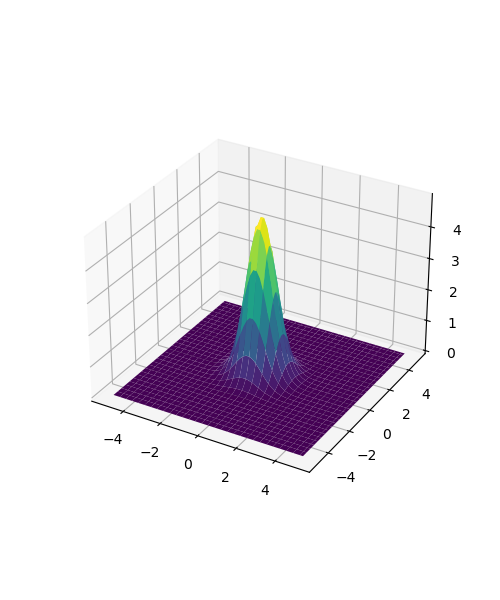

1.1253517471925912e-07


In [59]:
#T = InitT()

T = np.zeros((Nt,Nx,Ny))

for i in range(1,len(x)-1):
     for j in range(1,len(y)-1):
            T[0,i,j] = 5*np.exp(-1*((x[i])**2 + (y[j])**2))

fig1 = plt.figure(figsize=(5,6))
ax1 = fig1.add_subplot(111, projection='3d')

X1,Y1 = np.meshgrid(x,y)

ax1.plot_surface(X1,Y1,T[0,:,:],cmap='viridis')
print(np.exp(-(0 + (-4)**2)))

In [60]:
def GetSolution():
    
    for l in tqdm(range(1,len(t))):
    
        
        for i in range(1,len(x)-1):
            for j in range(1,len(y)-1):
                T[l,i,j] = (1 - lambda1_*(T[l-1, i+1, j] - T[l-1, i-1, j]) - \
                           mu1_*(T[l-1, i, j+1] - T[l-1, i, j-1]) - \
                           2*lambda_ - 2*mu_)*T[l-1, i, j] + \
                           lambda_*(T[l-1, i+1, j] + T[l-1, i-1, j]) + \
                           mu_*(T[l-1, i, j+1] + T[l-1, i, j-1])
                

In [61]:
GetSolution()

100%|███████████████████████████████████████████████████████████████████████████████| 499/499 [00:04<00:00, 105.29it/s]


<IPython.core.display.Javascript object>


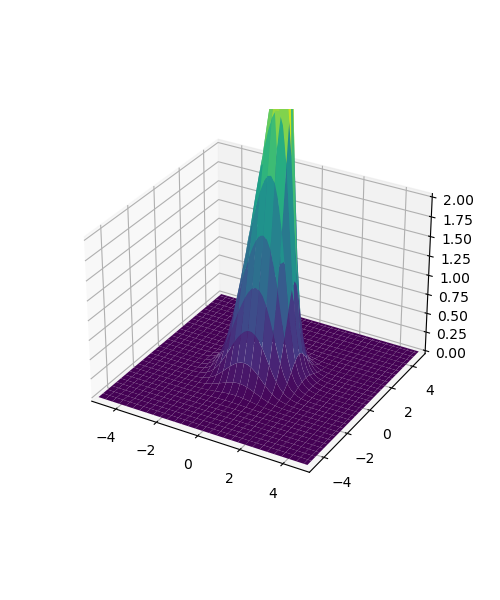

In [67]:
fig = plt.figure(figsize=(5,6))
ax = fig.add_subplot(111, projection='3d')

X,Y = np.meshgrid(x,y)

def init():
    
    True
    ax.set_xlim3d(-5,5)
    ax.set_ylim3d(-5,5)
    ax.set_zlim3d(0,2)

def Update(i):

    ax.clear()
    init()
    
    ax.plot_surface(X,Y,T[i,:,:],cmap='viridis')
    
Animation = animation.FuncAnimation(fig,Update,frames=len(t),init_func=init)